In [9]:
import json

import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from datasets import get_CIFAR10, get_SVHN, postprocess
from model import Glow

import glob
import train

device = torch.device("cpu")

output_folder = 'output/'
#model_name = 'glow_model_5.pth'
latest_model_path = glob.glob("output/glow_model_*.pth")[-1]

with open(output_folder + 'hparams.json') as json_file:  
    hparams = json.load(json_file)
    
#image_shape, num_classes, _, test_cifar = get_CIFAR10(hparams['augment'], hparams['dataroot'], hparams['download'])
#image_shape, num_classes, _, test_svhn = get_SVHN(hparams['augment'], hparams['dataroot'], hparams['download'])

test_mnist = train.MyMNIST(train=False, download=False)
image_shape = (32, 32, 1)
num_classes = 10
batch_size = 512


model = Glow(image_shape, hparams['hidden_channels'], hparams['K'], hparams['L'], hparams['actnorm_scale'],
             hparams['flow_permutation'], hparams['flow_coupling'], hparams['LU_decomposed'], num_classes,
             hparams['learn_top'], hparams['y_condition'])

model.load_state_dict(torch.load(latest_model_path))
model.set_actnorm_init()

model = model.to(device)

model = model.eval()

In [5]:
model

Glow(
  (flow): FlowNet(
    (layers): ModuleList(
      (0): SqueezeLayer()
      (1): FlowStep(
        (actnorm): ActNorm2d()
        (invconv): InvertibleConv1x1()
        (block): Sequential(
          (0): Conv2d(
            (conv): Conv2d(2, 512, kernel_size=(3, 3), stride=(1, 1), padding=[1, 1], bias=False)
            (actnorm): ActNorm2d()
          )
          (1): ReLU()
          (2): Conv2d(
            (conv): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1), padding=[0, 0], bias=False)
            (actnorm): ActNorm2d()
          )
          (3): ReLU()
          (4): Conv2dZeros(
            (conv): Conv2d(512, 4, kernel_size=(3, 3), stride=(1, 1), padding=[1, 1])
          )
        )
      )
      (2): FlowStep(
        (actnorm): ActNorm2d()
        (invconv): InvertibleConv1x1()
        (block): Sequential(
          (0): Conv2d(
            (conv): Conv2d(2, 512, kernel_size=(3, 3), stride=(1, 1), padding=[1, 1], bias=False)
            (actnorm): ActNorm2d()
 

In [10]:
def sample(model):
    with torch.no_grad():
        if hparams['y_condition']:
            y = torch.eye(num_classes)
            y = y.repeat(batch_size // num_classes + 1)
            y = y[:32, :].to(device) # number hardcoded in model for now
        else:
            y = None

        images = postprocess(model(y_onehot=y, temperature=1, reverse=True))

    return images.cpu()

(-0.5, 205.5, 171.5, -0.5)

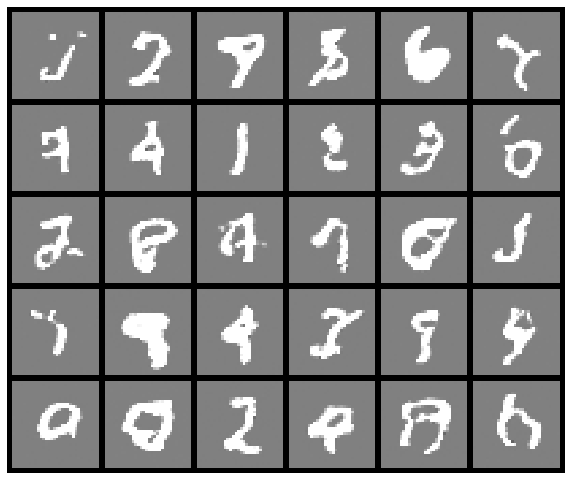

In [8]:
images = sample(model)
grid = make_grid(images[:30], nrow=6).permute(1,2,0)

plt.figure(figsize=(10,10))
plt.imshow(grid)
plt.axis('off')

In [ ]:
y = torch.zeros((32,1)).to(device)
model(y_onehot=y, temperature=1, reverse=True)

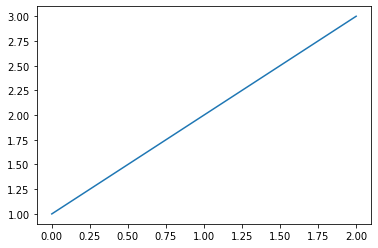

In [2]:
plt.plot([1,2,3])